In [39]:
import pandas as pd

df = pd.read_parquet("synthetic_text_to_sql/cached_test.parquet")

def classify_sql_complexity(record):
    """
    Classifies the complexity of a SQL query based on its record.
    Uses a rule-based approach on 'sql_complexity' and SQL keywords.
    """
    # Direct classification from the 'sql_complexity' field
    complexity_field = record.get('sql_complexity', '').lower()
    sql_query = record.get('sql', '').upper()

    # --- Hard Rules ---
    if 'window function' in complexity_field or 'complex subquery' in complexity_field:
        return 'hard'
    # Check for keywords if the complexity field is ambiguous
    if 'WITH ' in sql_query or 'OVER (' in sql_query or 'RANK()' in sql_query:
        return 'hard'

    # --- Medium Rules ---
    if 'join' in complexity_field or 'subquery' in complexity_field or 'having' in complexity_field:
        return 'medium'
    # Check for keywords
    if 'JOIN' in sql_query or 'HAVING' in sql_query:
        return 'medium'
        
    # --- Easy Rule (Default) ---
    # Covers 'simple select' and 'aggregation'
    return 'easy'

In [40]:
target_ids = [
    2656, 3008, 2531, 3792, 2311, 3329, 2912, 3170, 3518, 3925, 3340, 596, 2604, 5812, 4706, 1515, 4388, 
    5431, 3531, 5678, 5792, 5148, 5547, 5498, 3546, 486, 794, 3164, 3704, 2851, 3246, 3056, 264, 2838, 
    1187, 360, 335, 2866, 4440, 451, 2879, 5688, 3273, 1895, 4669, 5302, 267, 3028, 3282, 3474, 1626, 
    1315, 520, 3999, 2261, 3439, 2265, 1763, 5499, 2408, 2729, 2952, 4328, 4915, 5030, 4626, 2703, 200, 
    5131, 1160, 4708, 5608, 1506, 3117, 3542, 2274, 3705, 240, 2132, 3276, 3074, 2219, 3786, 2357, 1009, 
    4217, 5620, 3151, 2136, 5452, 5152, 2477, 4573, 3596, 5039, 2724, 2200, 4359, 1373, 904, 3299, 907, 
    1400, 5248, 778, 3859, 3551, 5168, 4916, 812, 5784, 3038, 1078, 5015, 1533, 4021, 1551, 2592, 3795, 
    4138, 312, 4298, 5211, 382, 2190, 1852, 2535, 2140, 4779, 1015, 3715, 1957, 1311, 2997, 3743, 4664, 
    251, 610, 421, 880, 454, 1086, 3455, 3936, 1838, 3091, 2399, 2972, 5576, 1560, 1201, 4243, 2321, 
    4349, 476, 2908, 636, 3404, 134, 592, 1989, 1388, 1628, 2300, 4976, 4637, 4947, 4767, 4495, 2513, 
    873, 471, 1301, 4667, 1006, 3635, 4932, 365, 521, 5687, 1281, 5669, 3576, 1970, 2414, 1898, 2403, 
    124, 1231, 1485, 5806, 4126, 4559, 456, 459, 2356
]
len(target_ids)

196

In [41]:
filtered_df = df[df['id'].isin(target_ids)].copy()
filtered_df['complexity'] = filtered_df.apply(classify_sql_complexity, axis=1)


In [42]:
complexity_map = pd.Series(filtered_df.complexity.values, index=filtered_df.id).to_dict()


In [43]:
complexity_map

{124: 'easy',
 134: 'easy',
 200: 'hard',
 240: 'easy',
 251: 'easy',
 264: 'easy',
 267: 'easy',
 312: 'easy',
 335: 'medium',
 360: 'hard',
 365: 'easy',
 382: 'hard',
 421: 'easy',
 451: 'medium',
 454: 'medium',
 456: 'hard',
 459: 'easy',
 471: 'easy',
 476: 'easy',
 486: 'medium',
 520: 'medium',
 521: 'easy',
 592: 'easy',
 596: 'easy',
 610: 'easy',
 636: 'easy',
 778: 'medium',
 794: 'medium',
 812: 'medium',
 873: 'medium',
 880: 'easy',
 904: 'easy',
 907: 'easy',
 1006: 'easy',
 1009: 'medium',
 1015: 'medium',
 1078: 'easy',
 1086: 'easy',
 1160: 'easy',
 1187: 'medium',
 1201: 'easy',
 1231: 'easy',
 1281: 'easy',
 1301: 'medium',
 1311: 'easy',
 1315: 'medium',
 1373: 'easy',
 1388: 'easy',
 1400: 'medium',
 1485: 'easy',
 1506: 'easy',
 1515: 'medium',
 1533: 'medium',
 1551: 'medium',
 1560: 'easy',
 1626: 'easy',
 1628: 'hard',
 1763: 'medium',
 1838: 'hard',
 1852: 'medium',
 1895: 'hard',
 1898: 'medium',
 1957: 'easy',
 1970: 'medium',
 1989: 'medium',
 2132: 'easy

In [27]:
filtered_df[["id", "sql_complexity", "sql_prompt", "sql_context", "sql"]].to_csv("test.csv")

In [28]:
filtered_df

,id,domain,domain_description,sql_complexity,sql_complexity_description,sql_task_type,sql_task_type_description,sql_prompt,sql_context,sql,sql_explanation,complexity
123,124,technology,"Extensive data on ethical AI, technology for s...",set operations,"set operations such as UNION, INTERSECT, and E...",analytics and reporting,"generating reports, dashboards, and analytical...",Find the intersection of AI and accessibility ...,CREATE SCHEMA if not exists accessibility; CRE...,SELECT project_name FROM accessibility.researc...,The SQL query finds the intersection of AI and...,Easy
133,134,higher education,"Graduate student records, research grant data,...",subqueries,"subqueries, including correlated and nested su...",analytics and reporting,"generating reports, dashboards, and analytical...",Who are the top 3 authors with the most citati...,"CREATE TABLE authors (id INT, name VARCHAR(50)...","SELECT author, SUM(cites) as total_cites FROM ...",This query lists the top 3 authors with the mo...,Easy
199,200,manufacturing,"Detailed records on ethical manufacturing, cir...",window functions,"window functions (e.g., ROW_NUMBER, LEAD, LAG,...",analytics and reporting,"generating reports, dashboards, and analytical...",List the top three categories of workforce dev...,"CREATE TABLE programs (program_id INT, program...","SELECT category, SUM(budget - LAG(budget) OVER...",Use the LAG window function to access the prev...,Hard
239,240,sustainable energy,"Renewable energy project data, energy efficien...",aggregation,"aggregation functions (COUNT, SUM, AVG, MIN, M...",analytics and reporting,"generating reports, dashboards, and analytical...",What is the average capacity of renewable ener...,"CREATE TABLE projects (name TEXT, type TEXT, c...","SELECT country, AVG(capacity) FROM projects GR...",This query selects the country column and the ...,Easy
250,251,rural development,"Agricultural innovation metrics, rural infrast...",set operations,"set operations such as UNION, INTERSECT, and E...",analytics and reporting,"generating reports, dashboards, and analytical...",Compare the number of economic diversification...,CREATE TABLE economic_diversification (region ...,"SELECT 'Europe' as region, project_type, COUNT...",This SQL query uses the UNION operator to comb...,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...
5687,5688,nonprofit,"Nonprofit data on charitable giving trends, so...",single join,"only one join (specify inner, outer, cross)",analytics and reporting,"generating reports, dashboards, and analytical...",What is the total amount donated to a specific...,"CREATE TABLE causes (id INT, name TEXT); CREAT...",SELECT SUM(donation_amount) FROM donations JOI...,This query joins the donations table with the ...,Medium
5783,5784,fitness industry,"Workout data, membership demographics, wearabl...",set operations,"set operations such as UNION, INTERSECT, and E...",analytics and reporting,"generating reports, dashboards, and analytical...",List the number of users who have completed a ...,"CREATE TABLE workouts (id INT, user_id INT, wo...",SELECT COUNT(*) FROM (SELECT user_id FROM work...,The SQL query uses the INTERSECT operator to f...,Easy
5791,5792,legal services,"Case outcomes, legal precedents, attorney perf...",multiple_joins,"two or more joins (specify inner, outer, cross)",analytics and reporting,"generating reports, dashboards, and analytical...",How many cases were handled by attorneys in th...,"CREATE TABLE offices (office_id INT, office_na...",SELECT COUNT(*) FROM cases JOIN attorneys ON c...,"This query joins the 'cases', 'attorneys', and...",Medium
5805,5806,defense industry,"Defense contract data, military equipment main...",single join,"only one join (specify inner, outer, cross)",analytics and reporting,"generating reports, dashboards, and analytical...",List the top 3 countries with the most veteran...,CREATE TABLE veteran_employment (employee_id I...,"SELECT country, COUNT(*) as num_veterans FROM ...",* The SQL query 

In [29]:
from complexity_map import complexity_map

In [30]:
value=[]
value2=[]
for id in target_ids:
    # print(complexity_map.get(id))
    value.append(complexity_map.get(id))
len(value2)

0

In [31]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Normalize both maps (capitalize values)
# map1 = {k: v.capitalize() for k, v in complexity_map.items()}
# map2 = {k: v.capitalize() for k, v in complexity_map2.items()}

# # Get union of all keys
# all_keys = sorted(set(map1) | set(map2))

# # Build a DataFrame for comparison
# df = pd.DataFrame({
#     'ID': all_keys,
#     'Map1': [map1.get(k, 'Missing') for k in all_keys],
#     'Map2': [map2.get(k, 'Missing') for k in all_keys]
# })

# # Add a comparison column
# df['Match'] = df['Map1'] == df['Map2']

# # Display mismatch summary
# print(df[df['Match'] == False].head())

# # Count mismatches by type
# mismatch_counts = df[df['Match'] == False].groupby(['Map1', 'Map2']).size().reset_index(name='Count')

# # Plot mismatches as heatmap
# pivot = mismatch_counts.pivot(index='Map1', columns='Map2', values='Count').fillna(0)

# plt.figure(figsize=(8, 6))
# sns.heatmap(pivot, annot=True, fmt='.0f', cmap='coolwarm')
# plt.title('Mismatch Count Between Map1 and Map2')
# plt.show()


In [32]:
# # Count frequencies in both maps
# map1_counts = pd.Series(map1.values()).value_counts().sort_index()
# map2_counts = pd.Series(map2.values()).value_counts().sort_index()

# # Combine into one DataFrame for plotting
# freq_df = pd.DataFrame({
#     'Map1': map1_counts,
#     'Map2': map2_counts
# }).fillna(0).astype(int)

# # Plot
# freq_df.plot(kind='bar', figsize=(8, 5))
# plt.title('Frequency of Complexity Levels in Each Map')
# plt.ylabel('Count')
# plt.xlabel('Complexity Level')
# plt.xticks(rotation=0)
# plt.legend(title='Map')
# plt.tight_layout()
# plt.show()


In [49]:
from complexity_map import complexity_map

In [58]:

# Normalize complexity_map (capitalize)
# normalized_map = {k: v.capitalize() for k, v in complexity_map.items()}

# Map to the dataframe
filtered_df["LeetCode_Difficulty"] = filtered_df["id"].map(complexity_map)

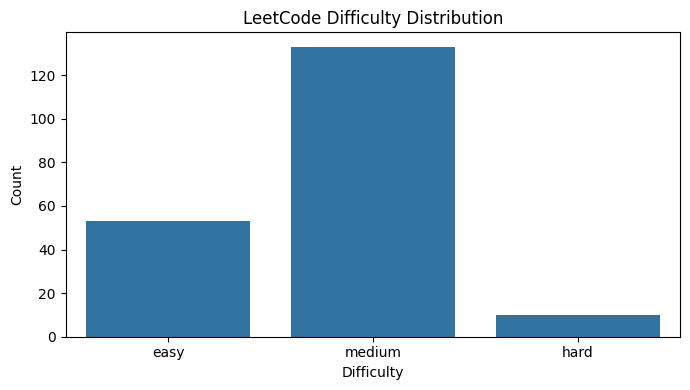

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
sns.countplot(data=filtered_df, x="LeetCode_Difficulty", order=["easy", "medium", "hard"])
plt.title("LeetCode Difficulty Distribution")
plt.ylabel("Count")
plt.xlabel("Difficulty")
plt.tight_layout()
plt.show()


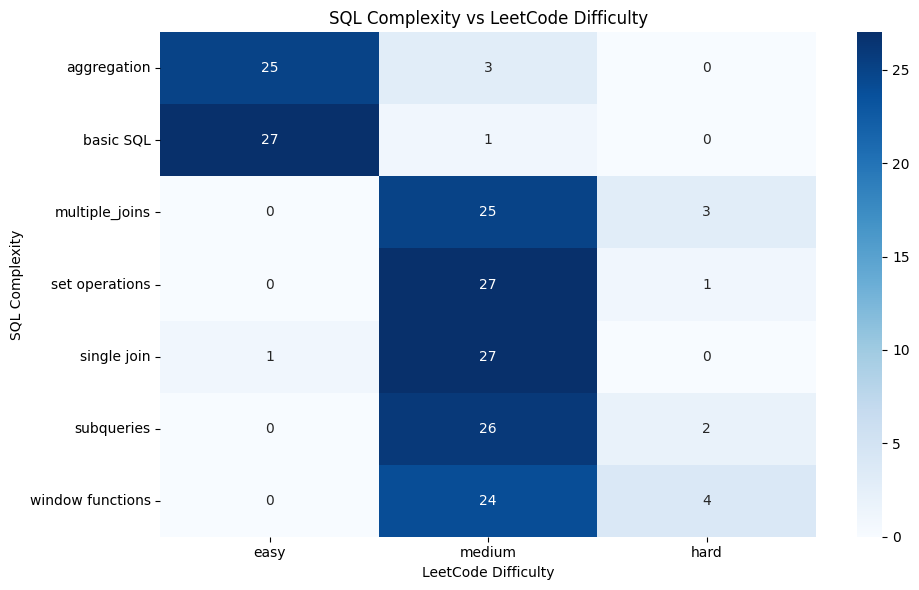

In [61]:
# Crosstab
heatmap_df = pd.crosstab(filtered_df["sql_complexity"], filtered_df["LeetCode_Difficulty"])
# Desired order of LeetCode difficulties
difficulty_order = ["easy", "medium", "hard"]

# Reorder columns
ordered_heatmap_df = heatmap_df.reindex(columns=difficulty_order)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(ordered_heatmap_df, annot=True, fmt="d", cmap="Blues")
plt.title("SQL Complexity vs LeetCode Difficulty")
plt.ylabel("SQL Complexity")
plt.xlabel("LeetCode Difficulty")
plt.tight_layout()
plt.show()


In [53]:
missing_ids = filtered_df[~filtered_df["id"].isin(complexity_map)]
print(missing_ids["id"].unique())


[]


In [54]:
print(filtered_df["LeetCode_Difficulty"])

123     Medium
133     Medium
199       Hard
239       Easy
250     Medium
         ...  
5687    Medium
5783    Medium
5791    Medium
5805    Medium
5811    Medium
Name: LeetCode_Difficulty, Length: 196, dtype: object
